In [45]:
import json
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import random

# Show img and annotations

## Show img

In [57]:
path = "./data/anotaciones_merge/video1_moto.json"
anno = open(path)
data = json.load(anno) 
anno.close()

In [82]:
#“image_id”: The identifier of the image containing the annotated object.
data["annotations"][30]

{'id': 31,
 'image_id': 3901,
 'category_id': 2,
 'segmentation': [],
 'area': 7771.450500000005,
 'bbox': [904.77, 257.38, 79.83, 97.35],
 'iscrowd': 0,
 'attributes': {'occluded': False, 'rotation': 0.0}}

[hevc @ 0x557488781480] Could not find ref with POC 84


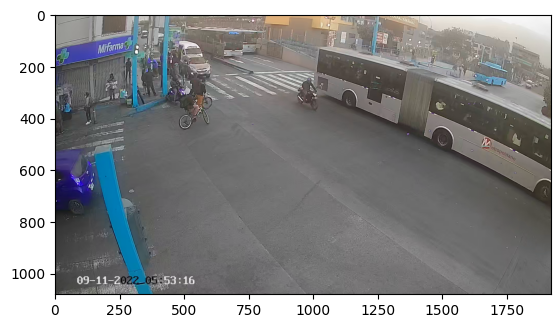

In [85]:
cap = cv2.VideoCapture("./videos/video1.mp4")
cap.set(1, 3901)
ret, frame = cap.read()
plt.imshow(frame)

## Using annotations

In [89]:
data["annotations"][30]["bbox"]

[904.77, 257.38, 79.83, 97.35]

In [92]:
#bbox”: A list of four numbers representing 
#the bounding box of the annotated object in
# the format [x, y, width, height], where (x, y) is the top-left corner of the bounding box.

top = 257
left = 905

right = 79+left
bottom = 97+top

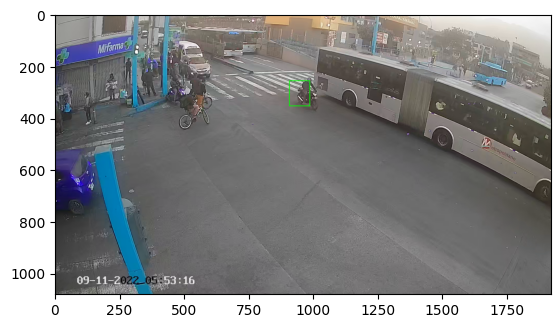

In [93]:
img = cv2.rectangle(frame.copy(), (left,top),(right,bottom),(0,255,0),2 )
plt.imshow(img)

# Merge data from video1

## Load Data

In [23]:
data_json = []
for file in os.listdir("./data/anotaciones_merge/"):
    print("file : ", file)
    annotation = open("./data/anotaciones_merge/" + file)
    data_json.append(json.load(annotation))
    annotation.close()

file :  video1_articulado.json
file :  video1_omnibus.json
file :  video1_auto_colectivo.json
file :  video1_moto.json
file :  video1_bus.json
file :  video1_camioneta.json
file :  video1_microbus.json
file :  video1_auto_privado.json


## Categories

In [24]:
for i in data_json:
    print(i["categories"])

[{'id': 1, 'name': 'articulado', 'supercategory': ''}, {'id': 2, 'name': 'exp1', 'supercategory': ''}, {'id': 3, 'name': 'exp2', 'supercategory': ''}]
[{'id': 1, 'name': 'Transporte Escolar', 'supercategory': ''}, {'id': 2, 'name': 'Ómnibus Interprovincial', 'supercategory': ''}, {'id': 3, 'name': 'Otros', 'supercategory': ''}]
[{'id': 1, 'name': 'colectivos', 'supercategory': ''}]
[{'id': 1, 'name': 'Mototaxi', 'supercategory': ''}, {'id': 2, 'name': 'Moto lineal', 'supercategory': ''}]
[{'id': 1, 'name': 'AUTO PRIVADO', 'supercategory': ''}, {'id': 2, 'name': 'CAMINETA PICK UP', 'supercategory': ''}, {'id': 3, 'name': 'TAXI', 'supercategory': ''}, {'id': 4, 'name': 'MOTOTAXI', 'supercategory': ''}, {'id': 5, 'name': 'MOTO LINEAL', 'supercategory': ''}, {'id': 6, 'name': 'BICICLETAS', 'supercategory': ''}, {'id': 7, 'name': 'SCOOTER', 'supercategory': ''}, {'id': 8, 'name': 'TRANSPORTE ESCOLAR O DE PERSONAL', 'supercategory': ''}, {'id': 9, 'name': 'OMNIBÚS BUS INTERPROVINCIAL', 'supe

* 1 articulado
* 2 'Ómnibus Interprovincial'
* 1 colectivos
* 1 Mototaxi, 2 Moto lineal (OK)
* 13 BUS
* 3 'camioneta rural'
* 1 Microbus 
* 1 Auto Privado

## See the data

In [31]:
print("Licenses************")
for i in data_json:
    print(i["licenses"])

print("infos***************")
for i in data_json:    
    print(i["info"])


Licenses************
[{'name': '', 'id': 0, 'url': ''}]
[{'name': '', 'id': 0, 'url': ''}]
[{'name': '', 'id': 0, 'url': ''}]
[{'name': '', 'id': 0, 'url': ''}]
[{'name': '', 'id': 0, 'url': ''}]
[{'name': '', 'id': 0, 'url': ''}]
[{'name': '', 'id': 0, 'url': ''}]
[{'name': '', 'id': 0, 'url': ''}]
infos***************
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}

In [32]:
print("images**************")
for i in data_json:
    print(len(i["images"]))

print("annotations**********")
for i in data_json:
    print(len(i["annotations"]))

images**************
1506
30139
30139
30139
30139
30139
30139
30139
annotations**********
2436
29
63
256
216
472
31
105


problem with the data "articulados", it was using tools tracking (despedido). Remove the first data that is "articulado".

In [33]:
del data_json[0]

## Change id for name category

In [38]:
data_json[3]["annotations"][1]

{'id': 2,
 'image_id': 335,
 'category_id': 13,
 'segmentation': [],
 'area': 115162.52179999997,
 'bbox': [1273.15, 184.72, 397.03, 290.06],
 'iscrowd': 0,
 'attributes': {'occluded': False, 'rotation': 0.0}}

In [39]:
for anotation in data_json:
    for item in anotation["annotations"]:
        id_num = item["category_id"]
        item["category_id"] = anotation["categories"][id_num-1]["name"]


In [41]:
count = 1
for anotation in data_json:
    for item in anotation["annotations"]:
        item["id"] = count 
        if item["category_id"] in ["Auto Privado"]:
            item["category_id"]= 1
        elif item["category_id"] in ["BUS"]:
            item["category_id"]= 2
        elif item["category_id"] in ['camioneta rural']:
            item["category_id"]= 3
        elif item["category_id"] in ["Microbus"]:
            item["category_id"]= 4
        elif item["category_id"] in ["Mototaxi"]:
            item["category_id"]= 5
        elif item["category_id"] in ["Moto lineal"]:
            item["category_id"]= 6
        elif item["category_id"] in ["Ómnibus Interprovincial"]:
            item["category_id"]= 7
        elif item["category_id"] in ["colectivos"]:
            item["category_id"]= 8
        else :
            print(item["category_id"])
        count = count +1
print(count)

1173


## Create json file

In [43]:
annotation = []
for f in data_json:
    for i in f["annotations"]:
        annotation.append(i)

In [49]:
for i in random.sample(annotation,5):
    print(i)

{'id': 404, 'image_id': 9371, 'category_id': 2, 'segmentation': [], 'area': 85750.0, 'bbox': [1663.0, 287.0, 250.0, 343.0], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
{'id': 227, 'image_id': 14491, 'category_id': 6, 'segmentation': [], 'area': 2599.490400000003, 'bbox': [664.55, 162.05, 40.56, 64.09], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
{'id': 287, 'image_id': 20641, 'category_id': 6, 'segmentation': [], 'area': 34750.43839999997, 'bbox': [1715.63, 662.37, 173.44, 200.36], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
{'id': 545, 'image_id': 26390, 'category_id': 2, 'segmentation': [], 'area': 11984.073799999998, 'bbox': [1744.16, 228.66, 98.74, 121.37], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
{'id': 283, 'image_id': 20601, 'category_id': 6, 'segmentation': [], 'area': 20907.07200000001, 'bbox': [969.7, 317.9, 133.2, 156.96], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0

In [18]:
json_merge = {"licenses":[{'name': '', 'id': 0, 'url': ''}],
              "info":{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''},
              "categories":[{'id': 1, 'name': 'Auto Privado', 'supercategory': ''},
                            {'id': 2, 'name': 'Bus', 'supercategory': ''},
                            {'id': 3, 'name': 'Camioneta rural', 'supercategory': ''},
                            {'id': 4, 'name': 'Microbus', 'supercategory': ''},
                            {'id': 5, 'name': 'Mototaxi', 'supercategory': ''},
                            {'id': 6, 'name': 'Moto lineal', 'supercategory': ''},
                            {'id': 7, 'name': 'Omnibus Interprovincial', 'supercategory': ''},
                            {'id': 8, 'name': 'Auto colectivo', 'supercategory': ''},
                            {'id': 9, 'name': 'Articulado', 'supercategory': ''}],
              "images":data_json[0]["images"],
              "annotations":annotation}
#

In [50]:
with open("./data/anotaciones_merge/join_video1.json", "w") as outfile: 
    json.dump(json_merge, outfile)
